In [36]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import io
import unicodedata
import numpy as np
import re
import string
from numpy import linalg
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import webtext
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
with open('fb_sentiment.txt', encoding ='ISO-8859-2') as f:
    text = f.read()

In [4]:
sent_tokenizer = PunktSentenceTokenizer(text)
sents = sent_tokenizer.tokenize(text)

In [5]:
print(word_tokenize(text))
print(sent_tokenize(text))

['FBPost', 'Label', 'Drug', 'Runners', 'and', 'a', 'U.S', '.', 'Senator', 'have', 'something', 'to', 'do', 'with', 'the', 'Murder', 'http', ':', '//www.amazon.com/Circumstantial-Evidence-Getting-', 'Florida-Bozarth-ebook/dp/B004FPZ452/ref=pd_rhf_p_t_1', 'The', 'State', '0Attorney', 'Knows', '...', 'NOW', 'So', 'Will', 'You', '.', 'GET', 'Ypur', 'Copy', 'TODAY', 'O', 'Heres', 'a', 'single', ',', 'to', 'add', ',', 'to', 'Kindle', '.', 'Just', 'read', 'this', '19th', 'century', 'story', ':', '``', 'The', 'Ghost', 'of', 'Round', 'Island', "''", '.', 'Its', 'about', 'a', 'man', '(', 'French/American', 'Indian', ')', 'and', 'his', 'dog', 'sled', 'transporting', 'a', 'woman', 'across', 'the', 'ice', ',', 'from', '1Mackinac', 'Island', 'to', 'Cheboygan', '-', 'and', 'the', 'ghost', 'that', '...', 'O', 'If', 'you', 'tire', 'of', 'Non-Fiction', '..', 'Check', 'out', 'http', ':', '//www.amazon.com/s/ref=nb_sb_noss', '?', 'url=search-', '2alias', '%', '3Daps', '&', 'field-keywords=danielle+lee+zwi

In [6]:
porter_stemmer = PorterStemmer()

In [7]:
nltk_tokens = nltk.word_tokenize(text)

In [8]:
for w in nltk_tokens:
    print ("Actual: % s Stem: % s" % (w, porter_stemmer.stem(w)))

Actual: FBPost Stem: fbpost
Actual: Label Stem: label
Actual: Drug Stem: drug
Actual: Runners Stem: runner
Actual: and Stem: and
Actual: a Stem: a
Actual: U.S Stem: u.
Actual: . Stem: .
Actual: Senator Stem: senat
Actual: have Stem: have
Actual: something Stem: someth
Actual: to Stem: to
Actual: do Stem: do
Actual: with Stem: with
Actual: the Stem: the
Actual: Murder Stem: murder
Actual: http Stem: http
Actual: : Stem: :
Actual: //www.amazon.com/Circumstantial-Evidence-Getting- Stem: //www.amazon.com/circumstantial-evidence-getting-
Actual: Florida-Bozarth-ebook/dp/B004FPZ452/ref=pd_rhf_p_t_1 Stem: florida-bozarth-ebook/dp/b004fpz452/ref=pd_rhf_p_t_1
Actual: The Stem: the
Actual: State Stem: state
Actual: 0Attorney Stem: 0attorney
Actual: Knows Stem: know
Actual: ... Stem: ...
Actual: NOW Stem: now
Actual: So Stem: So
Actual: Will Stem: will
Actual: You Stem: you
Actual: . Stem: .
Actual: GET Stem: get
Actual: Ypur Stem: ypur
Actual: Copy Stem: copi
Actual: TODAY Stem: today
Actual: O 

Actual: half Stem: half
Actual: of Stem: of
Actual: what Stem: what
Actual: it Stem: it
Actual: used Stem: use
Actual: to Stem: to
Actual: be Stem: be
Actual: O Stem: O
Actual: I Stem: I
Actual: love Stem: love
Actual: my Stem: my
Actual: kindle Stem: kindl
Actual: also Stem: also
Actual: but Stem: but
Actual: I Stem: I
Actual: do Stem: do
Actual: have Stem: have
Actual: one Stem: one
Actual: problem Stem: problem
Actual: . Stem: .
Actual: My Stem: My
Actual: favorite Stem: favorit
Actual: authors Stem: author
Actual: are Stem: are
Actual: John Stem: john
Actual: Saul Stem: saul
Actual: , Stem: ,
Actual: Robin Stem: robin
Actual: Cook Stem: cook
Actual: and Stem: and
Actual: Patricia Stem: patricia
Actual: Cornwell Stem: cornwel
Actual: but Stem: but
Actual: I Stem: I
Actual: cant Stem: cant
Actual: ever Stem: ever
Actual: find Stem: find
Actual: 110them Stem: 110them
Actual: on Stem: on
Actual: the Stem: the
Actual: free Stem: free
Actual: list Stem: list
Actual: . Stem: .
Actual: : S

Actual: kindle Stem: kindl
Actual: ! Stem: !
Actual: Lol Stem: lol
Actual: P Stem: P
Actual: My Stem: My
Actual: wife Stem: wife
Actual: got Stem: got
Actual: me Stem: me
Actual: the Stem: the
Actual: Kindle Stem: kindl
Actual: dx Stem: dx
Actual: for Stem: for
Actual: Valentines Stem: valentin
Actual: since Stem: sinc
Actual: I Stem: I
Actual: read Stem: read
Actual: a Stem: a
Actual: lot Stem: lot
Actual: .. Stem: ..
Actual: I Stem: I
Actual: just Stem: just
Actual: love Stem: love
Actual: it Stem: it
Actual: , Stem: ,
Actual: where Stem: where
Actual: ever Stem: ever
Actual: I Stem: I
Actual: go Stem: go
Actual: it Stem: it
Actual: goes Stem: goe
Actual: with Stem: with
Actual: me.I Stem: me.i
Actual: warp Stem: warp
Actual: into Stem: into
Actual: another Stem: anoth
Actual: world Stem: world
Actual: as Stem: as
Actual: I Stem: I
Actual: 190start Stem: 190start
Actual: reading Stem: read
Actual: .. Stem: ..
Actual: n Stem: n
Actual: Kindle Stem: kindl
Actual: really Stem: realli
Ac

Actual: . Stem: .
Actual: P Stem: P
Actual: I Stem: I
Actual: read Stem: read
Actual: at Stem: at
Actual: least Stem: least
Actual: 3 Stem: 3
Actual: books Stem: book
Actual: a Stem: a
Actual: week Stem: week
Actual: so Stem: so
Actual: the Stem: the
Actual: free Stem: free
Actual: books Stem: book
Actual: are Stem: are
Actual: wonderful Stem: wonder
Actual: . Stem: .
Actual: If Stem: If
Actual: iI Stem: iI
Actual: find Stem: find
Actual: it Stem: it
Actual: boring Stem: bore
Actual: after Stem: after
Actual: a Stem: a
Actual: chapter Stem: chapter
Actual: or Stem: or
Actual: two Stem: two
Actual: , Stem: ,
Actual: I Stem: I
Actual: delete Stem: delet
Actual: it Stem: it
Actual: and Stem: and
Actual: get Stem: get
Actual: another Stem: anoth
Actual: . Stem: .
Actual: Since Stem: sinc
Actual: 270it Stem: 270it
Actual: was Stem: wa
Actual: free Stem: free
Actual: I Stem: I
Actual: dont Stem: dont
Actual: feel Stem: feel
Actual: bad Stem: bad
Actual: about Stem: about
Actual: deleting Ste

Actual: show Stem: show
Actual: up Stem: up
Actual: at Stem: at
Actual: all Stem: all
Actual: . Stem: .
Actual: N Stem: N
Actual: To Stem: To
Actual: delete Stem: delet
Actual: a Stem: a
Actual: sample Stem: sampl
Actual: after Stem: after
Actual: purchasing Stem: purchas
Actual: the Stem: the
Actual: book Stem: book
Actual: : Stem: :
Actual: highlight Stem: highlight
Actual: the Stem: the
Actual: sample Stem: sampl
Actual: on Stem: on
Actual: the Stem: the
Actual: Home Stem: home
Actual: page Stem: page
Actual: , Stem: ,
Actual: rift Stem: rift
Actual: select Stem: select
Actual: with Stem: with
Actual: the Stem: the
Actual: 5-way Stem: 5-way
Actual: and Stem: and
Actual: select Stem: select
Actual: delete Stem: delet
Actual: . Stem: .
Actual: This Stem: thi
Actual: 341permanently Stem: 341perman
Actual: deleted Stem: delet
Actual: the Stem: the
Actual: sample Stem: sampl
Actual: . Stem: .
Actual: O Stem: O
Actual: 342Thank Stem: 342thank
Actual: God Stem: god
Actual: ! Stem: !
Actual

Actual: the Stem: the
Actual: flap Stem: flap
Actual: is Stem: is
Actual: too Stem: too
Actual: big Stem: big
Actual: . Stem: .
Actual: Kind Stem: kind
Actual: of Stem: of
Actual: pricey Stem: pricey
Actual: . Stem: .
Actual: O Stem: O
Actual: 408Works Stem: 408work
Actual: great Stem: great
Actual: . Stem: .
Actual: Looks Stem: look
Actual: great Stem: great
Actual: . Stem: .
Actual: P Stem: P
Actual: I Stem: I
Actual: wonder Stem: wonder
Actual: if Stem: if
Actual: amazon Stem: amazon
Actual: will Stem: will
Actual: give Stem: give
Actual: me Stem: me
Actual: credit Stem: credit
Actual: for Stem: for
Actual: the Stem: the
Actual: cover Stem: cover
Actual: I Stem: I
Actual: bought Stem: bought
Actual: with Stem: with
Actual: my Stem: my
Actual: 409Kindle Stem: 409kindl
Actual: that Stem: that
Actual: makes Stem: make
Actual: it Stem: it
Actual: `` Stem: ``
Actual: glitchy Stem: glitchi
Actual: '' Stem: ''
Actual: ? Stem: ?
Actual: P Stem: P
Actual: I Stem: I
Actual: have Stem: have
Ac

Actual: use Stem: use
Actual: a Stem: a
Actual: bubble Stem: bubbl
Actual: wrap Stem: wrap
Actual: postage Stem: postag
Actual: envelope Stem: envelop
Actual: , Stem: ,
Actual: $ Stem: $
Actual: 0.79 Stem: 0.79
Actual: , Stem: ,
Actual: though Stem: though
Actual: mine Stem: mine
Actual: is Stem: is
Actual: 499repurposed Stem: 499repurpos
Actual: and Stem: and
Actual: thus Stem: thu
Actual: free Stem: free
Actual: ! Stem: !
Actual: O Stem: O
Actual: 500Mine Stem: 500mine
Actual: is Stem: is
Actual: awesome Stem: awesom
Actual: ! Stem: !
Actual: I Stem: I
Actual: wouldnt Stem: wouldnt
Actual: have Stem: have
Actual: a Stem: a
Actual: Kindle Stem: kindl
Actual: without Stem: without
Actual: it Stem: it
Actual: . Stem: .
Actual: P Stem: P
Actual: I Stem: I
Actual: love Stem: love
Actual: my Stem: my
Actual: Timbuk2 Stem: timbuk2
Actual: sleeve Stem: sleev
Actual: for Stem: for
Actual: my Stem: my
Actual: Kindle Stem: kindl
Actual: . Stem: .
Actual: Fits Stem: fit
Actual: perfect Stem: per

Actual: kindle Stem: kindl
Actual: . Stem: .
Actual: Just Stem: just
Actual: got Stem: got
Actual: my Stem: my
Actual: awesome Stem: awesom
Actual: case Stem: case
Actual: w/ Stem: w/
Actual: built Stem: built
Actual: in Stem: in
Actual: light Stem: light
Actual: 553yesterday Stem: 553yesterday
Actual: ! Stem: !
Actual: Love Stem: love
Actual: that Stem: that
Actual: too Stem: too
Actual: . Stem: .
Actual: = Stem: =
Actual: ) Stem: )
Actual: P Stem: P
Actual: 554I Stem: 554i
Actual: LOVE Stem: love
Actual: MY Stem: MY
Actual: KINDLE Stem: kindl
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !

Actual: hold Stem: hold
Actual: on Stem: on
Actual: with Stem: with
Actual: one Stem: one
Actual: 611hand Stem: 611hand
Actual: and Stem: and
Actual: hold Stem: hold
Actual: on Stem: on
Actual: to Stem: to
Actual: my Stem: my
Actual: Kindle Stem: kindl
Actual: with Stem: with
Actual: the Stem: the
Actual: other Stem: other
Actual: and Stem: and
Actual: read Stem: read
Actual: ! Stem: !
Actual: N Stem: N
Actual: when Stem: when
Actual: I Stem: I
Actual: was Stem: wa
Actual: a Stem: a
Actual: teen Stem: teen
Actual: , Stem: ,
Actual: I Stem: I
Actual: read Stem: read
Actual: everyday Stem: everyday
Actual: . Stem: .
Actual: Then Stem: then
Actual: raising Stem: rais
Actual: a Stem: a
Actual: family Stem: famili
Actual: I Stem: I
Actual: quit Stem: quit
Actual: reading Stem: read
Actual: . Stem: .
Actual: Now Stem: now
Actual: I Stem: I
Actual: have Stem: have
Actual: a Stem: a
Actual: Kindle Stem: kindl
Actual: and Stem: and
Actual: I Stem: I
Actual: am Stem: am
Actual: beginning Stem: b

Actual: the Stem: the
Actual: 673best Stem: 673best
Actual: gift Stem: gift
Actual: ever Stem: ever
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: P Stem: P
Actual: 674I Stem: 674i
Actual: love Stem: love
Actual: my Stem: my
Actual: Kindle Stem: kindl
Actual: too Stem: too
Actual: ! Stem: !
Actual: : Stem: :
Actual: ) Stem: )
Actual: P Stem: P
Actual: 675It Stem: 675it
Actual: really Stem: realli
Actual: comes Stem: come
Actual: in Stem: in
Actual: handy Stem: handi
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: ! Stem: !
Actual: P Stem: P
Actual: 676How Stem: 676how
Actual: ironic Stem: iron
Actual: ! Stem: !
Actual: I Stem: I
Actual: was Stem: wa
Actual: just Stem: just
Actual: using Stem: use
Actual: that Stem: that
Actual: today Stem: today
Actual: ! Stem: !
Actual: O Stem: O
Actual: Absolutely Stem: absolut
Actual: love Stem: love
Actual: my Stem: my
Actual: kindle Stem: kindl
Actual: . Stem: .
Actual: Wish Stem: wi

Actual: to Stem: to
Actual: the Stem: the
Actual: precise Stem: precis
Actual: word Stem: word
Actual: with Stem: with
Actual: the Stem: the
Actual: 5 Stem: 5
Actual: way Stem: way
Actual: key Stem: key
Actual: 783is Stem: 783i
Actual: a Stem: a
Actual: pain Stem: pain
Actual: ... Stem: ...
Actual: I Stem: I
Actual: wish Stem: wish
Actual: I Stem: I
Actual: can Stem: can
Actual: type Stem: type
Actual: it Stem: it
Actual: in Stem: in
Actual: a Stem: a
Actual: the Stem: the
Actual: meaning Stem: mean
Actual: just Stem: just
Actual: gets Stem: get
Actual: displayed Stem: display
Actual: ! Stem: !
Actual: P Stem: P
Actual: @ Stem: @
Actual: Karen Stem: karen
Actual: , Stem: ,
Actual: yes Stem: ye
Actual: you Stem: you
Actual: can Stem: can
Actual: do Stem: do
Actual: in Stem: in
Actual: on Stem: on
Actual: the Stem: the
Actual: original Stem: origin
Actual: Kindles Stem: kindl
Actual: . Stem: .
Actual: You Stem: you
Actual: have Stem: have
Actual: to Stem: to
Actual: scroll Stem: scroll
A

Actual: just Stem: just
Actual: assume Stem: assum
Actual: now Stem: now
Actual: that Stem: that
Actual: anyone Stem: anyon
Actual: in Stem: in
Actual: the Stem: the
Actual: ghettos Stem: ghetto
Actual: of Stem: of
Actual: the Stem: the
Actual: world Stem: world
Actual: a.k.a Stem: a.k.a
Actual: `` Stem: ``
Actual: developing Stem: develop
Actual: countries Stem: countri
Actual: '' Stem: ''
Actual: cant Stem: cant
Actual: read Stem: read
Actual: ? Stem: ?
Actual: As Stem: As
Actual: if Stem: if
Actual: your Stem: your
Actual: capitalized Stem: capit
Actual: sentence Stem: sentenc
Actual: didnt Stem: didnt
Actual: ooze Stem: ooz
Actual: sarcasm Stem: sarcasm
Actual: . Stem: .
Actual: How Stem: how
Actual: could Stem: could
Actual: you Stem: you
Actual: think Stem: think
Actual: 878that Stem: 878that
Actual: wasnt Stem: wasnt
Actual: rude Stem: rude
Actual: ? Stem: ?
Actual: N Stem: N
Actual: While Stem: while
Actual: there Stem: there
Actual: are Stem: are
Actual: issues Stem: issu
Actu

Actual: my Stem: my
Actual: kindle Stem: kindl
Actual: , Stem: ,
Actual: just Stem: just
Actual: wondering Stem: wonder
Actual: do Stem: do
Actual: most Stem: most
Actual: kindle Stem: kindl
Actual: owners Stem: owner
Actual: use Stem: use
Actual: their Stem: their
Actual: Kindle Stem: kindl
Actual: with Stem: with
Actual: the Stem: the
Actual: leather Stem: leather
Actual: cover Stem: cover
Actual: on Stem: on
Actual: or Stem: or
Actual: not Stem: not
Actual: ? Stem: ?
Actual: ? Stem: ?
Actual: ? Stem: ?
Actual: I Stem: I
Actual: use Stem: use
Actual: it Stem: it
Actual: with Stem: with
Actual: the Stem: the
Actual: 952cover Stem: 952cover
Actual: myself Stem: myself
Actual: . Stem: .
Actual: . Stem: .
Actual: . Stem: .
Actual: P Stem: P
Actual: 953LOVE Stem: 953love
Actual: LOVE Stem: love
Actual: LOVE Stem: love
Actual: my Stem: my
Actual: Kindle Stem: kindl
Actual: . Stem: .
Actual: P Stem: P
Actual: 954Not Stem: 954not
Actual: a Stem: a
Actual: very Stem: veri
Actual: clever Stem:

In [9]:
wordnet_lemmatizer = WordNetLemmatizer()
nltk_tokens = nltk.word_tokenize(text)

In [10]:
wordnet_lemmatizer = WordNetLemmatizer()
nltk_tokens = nltk.word_tokenize(text)

In [11]:
for w in nltk_tokens:
    print ("Actual: % s Lemma: % s" % (w, wordnet_lemmatizer.lemmatize(w)))

Actual: FBPost Lemma: FBPost
Actual: Label Lemma: Label
Actual: Drug Lemma: Drug
Actual: Runners Lemma: Runners
Actual: and Lemma: and
Actual: a Lemma: a
Actual: U.S Lemma: U.S
Actual: . Lemma: .
Actual: Senator Lemma: Senator
Actual: have Lemma: have
Actual: something Lemma: something
Actual: to Lemma: to
Actual: do Lemma: do
Actual: with Lemma: with
Actual: the Lemma: the
Actual: Murder Lemma: Murder
Actual: http Lemma: http
Actual: : Lemma: :
Actual: //www.amazon.com/Circumstantial-Evidence-Getting- Lemma: //www.amazon.com/Circumstantial-Evidence-Getting-
Actual: Florida-Bozarth-ebook/dp/B004FPZ452/ref=pd_rhf_p_t_1 Lemma: Florida-Bozarth-ebook/dp/B004FPZ452/ref=pd_rhf_p_t_1
Actual: The Lemma: The
Actual: State Lemma: State
Actual: 0Attorney Lemma: 0Attorney
Actual: Knows Lemma: Knows
Actual: ... Lemma: ...
Actual: NOW Lemma: NOW
Actual: So Lemma: So
Actual: Will Lemma: Will
Actual: You Lemma: You
Actual: . Lemma: .
Actual: GET Lemma: GET
Actual: Ypur Lemma: Ypur
Actual: Copy Lemma: 

Actual: PDF Lemma: PDF
Actual: the Lemma: the
Actual: use Lemma: use
Actual: 118caliber Lemma: 118caliber
Actual: for Lemma: for
Actual: the Lemma: the
Actual: conversion Lemma: conversion
Actual: . Lemma: .
Actual: P Lemma: P
Actual: 119One Lemma: 119One
Actual: of Lemma: of
Actual: the Lemma: the
Actual: BEST Lemma: BEST
Actual: gifts Lemma: gift
Actual: I Lemma: I
Actual: have Lemma: have
Actual: ever Lemma: ever
Actual: received Lemma: received
Actual: . Lemma: .
Actual: P Lemma: P
Actual: I Lemma: I
Actual: love Lemma: love
Actual: my Lemma: my
Actual: little Lemma: little
Actual: Kindle Lemma: Kindle
Actual: , Lemma: ,
Actual: My Lemma: My
Actual: electronic Lemma: electronic
Actual: book Lemma: book
Actual: . Lemma: .
Actual: Id Lemma: Id
Actual: rather Lemma: rather
Actual: have Lemma: have
Actual: a Lemma: a
Actual: Kindle Lemma: Kindle
Actual: 120Than Lemma: 120Than
Actual: a Lemma: a
Actual: S Lemma: S
Actual: * Lemma: *
Actual: ny Lemma: ny
Actual: or Lemma: or
Actual: a Le

Actual: some Lemma: some
Actual: very Lemma: very
Actual: reasonably Lemma: reasonably
Actual: priced Lemma: priced
Actual: ) Lemma: )
Actual: that Lemma: that
Actual: I Lemma: I
Actual: can Lemma: can
Actual: play Lemma: play
Actual: when Lemma: when
Actual: I Lemma: I
Actual: am Lemma: am
Actual: not Lemma: not
Actual: reading Lemma: reading
Actual: . Lemma: .
Actual: I Lemma: I
Actual: still Lemma: still
Actual: buy Lemma: buy
Actual: a Lemma: a
Actual: few Lemma: few
Actual: paper Lemma: paper
Actual: books Lemma: book
Actual: but Lemma: but
Actual: the Lemma: the
Actual: 205Kindle Lemma: 205Kindle
Actual: is Lemma: is
Actual: so Lemma: so
Actual: much Lemma: much
Actual: easier Lemma: easier
Actual: to Lemma: to
Actual: read Lemma: read
Actual: in Lemma: in
Actual: bed Lemma: bed
Actual: . Lemma: .
Actual: P Lemma: P
Actual: 206Best Lemma: 206Best
Actual: thing Lemma: thing
Actual: since Lemma: since
Actual: slice Lemma: slice
Actual: bread Lemma: bread
Actual: ! Lemma: !
Actual: 

Actual: , Lemma: ,
Actual: especially Lemma: especially
Actual: the Lemma: the
Actual: higher Lemma: higher
Actual: ones Lemma: one
Actual: ( Lemma: (
Actual: youll Lemma: youll
Actual: note Lemma: note
Actual: that Lemma: that
Actual: on Lemma: on
Actual: many Lemma: many
Actual: books Lemma: book
Actual: its Lemma: it
Actual: 278noted Lemma: 278noted
Actual: that Lemma: that
Actual: `` Lemma: ``
Actual: This Lemma: This
Actual: price Lemma: price
Actual: was Lemma: wa
Actual: set Lemma: set
Actual: by Lemma: by
Actual: the Lemma: the
Actual: publisher Lemma: publisher
Actual: '' Lemma: ''
Actual: ) Lemma: )
Actual: . Lemma: .
Actual: O Lemma: O
Actual: Thnx Lemma: Thnx
Actual: for Lemma: for
Actual: this Lemma: this
Actual: post Lemma: post
Actual: I Lemma: I
Actual: just Lemma: just
Actual: downloaded Lemma: downloaded
Actual: 12 Lemma: 12
Actual: new Lemma: new
Actual: books Lemma: book
Actual: for Lemma: for
Actual: free Lemma: free
Actual: ! Lemma: !
Actual: I Lemma: I
Actual: lo

Actual: Mainers Lemma: Mainers
Actual: are Lemma: are
Actual: still Lemma: still
Actual: waiting Lemma: waiting
Actual: for Lemma: for
Actual: Kindle Lemma: Kindle
Actual: to Lemma: to
Actual: adopt Lemma: adopt
Actual: the Lemma: the
Actual: technology Lemma: technology
Actual: that Lemma: that
Actual: others Lemma: others
Actual: have Lemma: have
Actual: so Lemma: so
Actual: people Lemma: people
Actual: can Lemma: can
Actual: download Lemma: download
Actual: books Lemma: book
Actual: through Lemma: through
Actual: the Lemma: the
Actual: state Lemma: state
Actual: library Lemma: library
Actual: website Lemma: website
Actual: . Lemma: .
Actual: Hey Lemma: Hey
Actual: , Lemma: ,
Actual: Amazon Lemma: Amazon
Actual: , Lemma: ,
Actual: Im Lemma: Im
Actual: a Lemma: a
Actual: public Lemma: public
Actual: library Lemma: library
Actual: director Lemma: director
Actual: and Lemma: and
Actual: even Lemma: even
Actual: though Lemma: though
Actual: I Lemma: I
Actual: love Lemma: love
Actual: my 

Actual: cover Lemma: cover
Actual: with Lemma: with
Actual: the Lemma: the
Actual: pull-out Lemma: pull-out
Actual: light Lemma: light
Actual: in Lemma: in
Actual: the Lemma: the
Actual: 466corner Lemma: 466corner
Actual: . Lemma: .
Actual: P Lemma: P
Actual: 467i Lemma: 467i
Actual: like Lemma: like
Actual: the Lemma: the
Actual: covers Lemma: cover
Actual: that Lemma: that
Actual: look Lemma: look
Actual: like Lemma: like
Actual: a Lemma: a
Actual: book Lemma: book
Actual: P Lemma: P
Actual: I Lemma: I
Actual: have Lemma: have
Actual: the Lemma: the
Actual: larger Lemma: larger
Actual: version Lemma: version
Actual: for Lemma: for
Actual: the Lemma: the
Actual: DX Lemma: DX
Actual: - Lemma: -
Actual: the Lemma: the
Actual: one Lemma: one
Actual: major Lemma: major
Actual: complaint Lemma: complaint
Actual: is Lemma: is
Actual: that Lemma: that
Actual: 468the Lemma: 468the
Actual: velcro Lemma: velcro
Actual: is Lemma: is
Actual: a Lemma: a
Actual: bit Lemma: bit
Actual: loud Lemma: l

Actual: a Lemma: a
Actual: picture Lemma: picture
Actual: of Lemma: of
Actual: me Lemma: me
Actual: reading Lemma: reading
Actual: my Lemma: my
Actual: `` Lemma: ``
Actual: vintage Lemma: vintage
Actual: '' Lemma: ''
Actual: first Lemma: first
Actual: gen. Lemma: gen.
Actual: kindle Lemma: kindle
Actual: with Lemma: with
Actual: my Lemma: my
Actual: baby Lemma: baby
Actual: sleeping Lemma: sleeping
Actual: in Lemma: in
Actual: my Lemma: my
Actual: arms Lemma: arm
Actual: and Lemma: and
Actual: a Lemma: a
Actual: 565kitty Lemma: 565kitty
Actual: on Lemma: on
Actual: the Lemma: the
Actual: armrest Lemma: armrest
Actual: of Lemma: of
Actual: the Lemma: the
Actual: chair Lemma: chair
Actual: we Lemma: we
Actual: were Lemma: were
Actual: in Lemma: in
Actual: : Lemma: :
Actual: ) Lemma: )
Actual: P Lemma: P
Actual: 566Thats Lemma: 566Thats
Actual: the Lemma: the
Actual: reason Lemma: reason
Actual: I Lemma: I
Actual: bought Lemma: bought
Actual: my Lemma: my
Actual: kindle Lemma: kindle
Actu

Actual: to Lemma: to
Actual: read Lemma: read
Actual: my Lemma: my
Actual: Nieces Lemma: Nieces
Actual: book Lemma: book
Actual: , Lemma: ,
Actual: Wind Lemma: Wind
Actual: In Lemma: In
Actual: The Lemma: The
Actual: Grasses Lemma: Grasses
Actual: Dancing Lemma: Dancing
Actual: . Lemma: .
Actual: Check Lemma: Check
Actual: it Lemma: it
Actual: out Lemma: out
Actual: . Lemma: .
Actual: Very Lemma: Very
Actual: 638afordable Lemma: 638afordable
Actual: ! Lemma: !
Actual: By Lemma: By
Actual: Terrie Lemma: Terrie
Actual: McClay Lemma: McClay
Actual: ! Lemma: !
Actual: ! Lemma: !
Actual: ! Lemma: !
Actual: ! Lemma: !
Actual: P Lemma: P
Actual: I Lemma: I
Actual: read Lemma: read
Actual: to Lemma: to
Actual: my Lemma: my
Actual: husband Lemma: husband
Actual: every Lemma: every
Actual: night Lemma: night
Actual: from Lemma: from
Actual: my Lemma: my
Actual: kindle Lemma: kindle
Actual: 2 Lemma: 2
Actual: . Lemma: .
Actual: Its Lemma: Its
Actual: great Lemma: great
Actual: , Lemma: ,
Actual: 

Actual: that Lemma: that
Actual: ! Lemma: !
Actual: I Lemma: I
Actual: love Lemma: love
Actual: these Lemma: these
Actual: wonderful Lemma: wonderful
Actual: hints Lemma: hint
Actual: you Lemma: you
Actual: all Lemma: all
Actual: post Lemma: post
Actual: . Lemma: .
Actual: 723Keep Lemma: 723Keep
Actual: them Lemma: them
Actual: coming Lemma: coming
Actual: ! Lemma: !
Actual: P Lemma: P
Actual: weirdly Lemma: weirdly
Actual: , Lemma: ,
Actual: I Lemma: I
Actual: can Lemma: can
Actual: not Lemma: not
Actual: get Lemma: get
Actual: this Lemma: this
Actual: feature Lemma: feature
Actual: to Lemma: to
Actual: work Lemma: work
Actual: if Lemma: if
Actual: the Lemma: the
Actual: word Lemma: word
Actual: in Lemma: in
Actual: question Lemma: question
Actual: is Lemma: is
Actual: the Lemma: the
Actual: 724first Lemma: 724first
Actual: one Lemma: one
Actual: on Lemma: on
Actual: the Lemma: the
Actual: left Lemma: left
Actual: hand Lemma: hand
Actual: margin Lemma: margin
Actual: side Lemma: side


Actual: to Lemma: to
Actual: offer Lemma: offer
Actual: the Lemma: the
Actual: 825hardback Lemma: 825hardback
Actual: for Lemma: for
Actual: sale Lemma: sale
Actual: & Lemma: &
Actual: re-buy Lemma: re-buy
Actual: for Lemma: for
Actual: Kindle Lemma: Kindle
Actual: . Lemma: .
Actual: P Lemma: P
Actual: So Lemma: So
Actual: luv Lemma: luv
Actual: my Lemma: my
Actual: Kindle Lemma: Kindle
Actual: - Lemma: -
Actual: one Lemma: one
Actual: of Lemma: of
Actual: the Lemma: the
Actual: best Lemma: best
Actual: gift Lemma: gift
Actual: ever Lemma: ever
Actual: received Lemma: received
Actual: - Lemma: -
Actual: luv Lemma: luv
Actual: all Lemma: all
Actual: the Lemma: the
Actual: 826features Lemma: 826features
Actual: ! Lemma: !
Actual: ! Lemma: !
Actual: ! Lemma: !
Actual: P Lemma: P
Actual: 827Thanks Lemma: 827Thanks
Actual: for Lemma: for
Actual: the Lemma: the
Actual: tip Lemma: tip
Actual: , Lemma: ,
Actual: Ive Lemma: Ive
Actual: only Lemma: only
Actual: had Lemma: had
Actual: my Lemma: m

Actual: do Lemma: do
Actual: things Lemma: thing
Actual: like Lemma: like
Actual: work Lemma: work
Actual: in Lemma: in
Actual: a Lemma: a
Actual: soup Lemma: soup
Actual: kitchen Lemma: kitchen
Actual: , Lemma: ,
Actual: help Lemma: help
Actual: clean Lemma: clean
Actual: up Lemma: up
Actual: parks Lemma: park
Actual: , Lemma: ,
Actual: and Lemma: and
Actual: clean Lemma: clean
Actual: graffiti Lemma: graffiti
Actual: from Lemma: from
Actual: public Lemma: public
Actual: areas Lemma: area
Actual: for Lemma: for
Actual: x Lemma: x
Actual: amount Lemma: amount
Actual: of Lemma: of
Actual: hours Lemma: hour
Actual: in Lemma: in
Actual: exchange Lemma: exchange
Actual: for Lemma: for
Actual: a Lemma: a
Actual: kindle Lemma: kindle
Actual: ? Lemma: ?
Actual: That Lemma: That
Actual: way Lemma: way
Actual: they Lemma: they
Actual: would Lemma: would
Actual: have Lemma: have
Actual: pride Lemma: pride
Actual: in Lemma: in
Actual: knowing Lemma: knowing
Actual: they Lemma: they
Actual: earned

In [12]:
text = nltk.word_tokenize(text)
print(nltk.pos_tag(text))

[('FBPost', 'NNP'), ('Label', 'NNP'), ('Drug', 'NNP'), ('Runners', 'NNP'), ('and', 'CC'), ('a', 'DT'), ('U.S', 'NNP'), ('.', '.'), ('Senator', 'NNP'), ('have', 'VBP'), ('something', 'NN'), ('to', 'TO'), ('do', 'VB'), ('with', 'IN'), ('the', 'DT'), ('Murder', 'NNP'), ('http', 'NN'), (':', ':'), ('//www.amazon.com/Circumstantial-Evidence-Getting-', 'JJ'), ('Florida-Bozarth-ebook/dp/B004FPZ452/ref=pd_rhf_p_t_1', 'NNP'), ('The', 'DT'), ('State', 'NNP'), ('0Attorney', 'CD'), ('Knows', 'NNP'), ('...', ':'), ('NOW', 'NNP'), ('So', 'NNP'), ('Will', 'NNP'), ('You', 'PRP'), ('.', '.'), ('GET', 'VB'), ('Ypur', 'NNP'), ('Copy', 'NNP'), ('TODAY', 'NNP'), ('O', 'NNP'), ('Heres', 'VBZ'), ('a', 'DT'), ('single', 'JJ'), (',', ','), ('to', 'TO'), ('add', 'VB'), (',', ','), ('to', 'TO'), ('Kindle', 'NNP'), ('.', '.'), ('Just', 'NNP'), ('read', 'VBD'), ('this', 'DT'), ('19th', 'JJ'), ('century', 'NN'), ('story', 'NN'), (':', ':'), ('``', '``'), ('The', 'DT'), ('Ghost', 'NNP'), ('of', 'IN'), ('Round', 'NNP

In [13]:
sid = SentimentIntensityAnalyzer() 
import nltk.data
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

In [14]:
with open('fb_sentiment.txt', encoding ='ISO-8859-2') as f:
    for text in f.read().split('\n'):
        print(text)
        scores = sid.polarity_scores(text)
        for key in sorted(scores):
            print('{0}: {1}, '.format(key, scores[key]), end ='')

  FBPost                                                                  Label
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,   Drug Runners and a U.S. Senator have something to do with the
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,   Murder http://www.amazon.com/Circumstantial-Evidence-Getting-
compound: -0.6908, neg: 0.825, neu: 0.175, pos: 0.0,   Florida-Bozarth-ebook/dp/B004FPZ452/ref=pd_rhf_p_t_1 The State
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,  0Attorney Knows... NOW So Will You. GET Ypur Copy TODAY                  O
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,   Heres a single, to add, to Kindle. Just read this 19th century story:
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,   "The Ghost of Round Island". Its about a man (French/American
compound: -0.3182, neg: 0.223, neu: 0.777, pos: 0.0,   Indian) and his dog sled transporting a woman across the ice, from
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,  1Mackinac Island to Cheboygan - and the ghost that...                

compound: 0.6369, neg: 0.0, neu: 0.756, pos: 0.244, 190start reading..n Kindle really doesnt get in the way!! Totally floored..:)P
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    One of our local schools in the County is looking into using Kindles
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    in the classroom for every student! WOW! They say it would be
compound: 0.7284, neg: 0.0, neu: 0.683, pos: 0.317, 191cheaper than expensive Textbooks and could save money!                    P
compound: 0.5411, neg: 0.0, neu: 0.667, pos: 0.333,    I carry my Kindly in my purse next to my cell phone. Would not be
compound: 0.4939, neg: 0.0, neu: 0.802, pos: 0.198,    without it. It is the best gadget I ever owned (second to it is my
compound: 0.6369, neg: 0.0, neu: 0.756, pos: 0.244,    Keurig coffee maker). K and K, Kindle and coffee, what could be
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 192better.                                                                   P
compound: 0.0, neg: 0.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    its still in your Archives, its probably because you havent turned on
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    wireless since you deleted. Your Kindle wont know its been
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 356permanently deleted until it can "talk to the mothership".               O
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    is there any way to alphabetize the collections on my Kindle? that
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 357would sure make searching easy!                                          P
compound: 0.6696, neg: 0.0, neu: 0.353, pos: 0.647, 358Cant believe how much I love my Kindle!!                                 P
compound: 0.6988, neg: 0.0, neu: 0.556, pos: 0.444,    how about when you delete from "Manage your kindle" and they still
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    show up on the kindle??? I called Amazon this week - tech had no
compound: -0.2593, neg: 0.19, neu: 0.693, pos: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    treadmill. Voila -- the Kindle makes it possible. Now, if I read my
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    Kindle while walking the time passes so quickly -- Im not ready to
compound: -0.2755, neg: 0.15, neu: 0.85, pos: 0.0,    get off the treadmill so quickly, I always have to read one more
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 549page, then one more again and so on.                                      O
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 550I did the samething with my Grandaughter                                  O
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 551I love kindle..thinking of getting the larger size!                       P
compound: 0.6696, neg: 0.0, neu: 0.609, pos: 0.391, 552I love my kindle too                                                      P
compound: 0.6369, neg: 0.0, neu: 0.488, pos: 0.512,    I LOVE my kindle. Just got my awesome case w/ built in light
compound: 0.876, neg: 0.0, neu:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    definition of a word by TOUCHING it. If the word is in the dictionary,
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    the definition will appear at the bottom of your screen. See how
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 707much easier those instructions are?                                        P
compound: 0.4215, neg: 0.0, neu: 0.588, pos: 0.412,    I also change the default dictionary depending upon the book I am
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    reading. The English dictionary for classic novels by Dickens or
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 708Doyle. American for contemporary novels by American writers.               P
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 709any way to use this feature on the Kindle for Android Ap?                  O
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    Just got my second kindle, love the smaller size. Same 3G
compound: 0.6369, neg: 0.0, neu: 0.704, pos: 0.296, 7

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    What a delightful and joyful article! I was in a very smart restaurant in
compound: 0.8997, neg: 0.0, neu: 0.421, pos: 0.579,    Goa about 2 months ago reading my Kindle - the guy at the next
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    table got out his iPad for nothing seemingly more than a bit of
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    showing off. The waiters were fascinated by the Kindle and all
compound: 0.4767, neg: 0.0, neu: 0.763, pos: 0.237, 889wanted to play with it. They ignored the iPad.                            P
compound: 0.0258, neg: 0.197, neu: 0.598, pos: 0.205,    What a brilliant article and idea! I love my Kindle and learn
compound: 0.8516, neg: 0.0, neu: 0.491, pos: 0.509,    something new every day I read it! The dictionary would be so
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,    helpful and the text to speech would help in learning to read!
compound: 0.6996, neg: 0.0, neu: 0.633, pos: 0.367, 890BRIL

In [15]:
sent_tokenizer = PunktSentenceTokenizer(text)
sents = sent_tokenizer.tokenize(text)
print(word_tokenize(text))
print(sent_tokenize(text))

[]
[]


In [16]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
nltk_tokens = nltk.word_tokenize(text)
for w in nltk_tokens:
     print ("Actual: % s stem: % s" % (w, porter_stemmer.stem(w)))

In [17]:
from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk_tokens = nltk.word_tokenize(text)
for w in nltk_tokens:
     print ("Actual: % s Lemma: % s" % (w,           wordnet_lemmatizer.lemmatize(w)))

In [18]:
text = nltk.word_tokenize(text)
print(nltk.pos_tag(text))

[]


In [34]:
sid = SentimentIntensityAnalyzer()
sentiment_object = {}
arr_sentiment = []
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
with open('fb_sentiment.txt', encoding ='ISO-8859-2') as f:
     for text in f.read().split('\n'):
          print(text)
          scores = sid.polarity_scores(text)
          sentiment_object = scores
          if(scores):
              arr_sentiment.append(scores)
              for key in sorted(scores):
               
                   print('{0}: {1}, '.format(key, scores[key]), end="")
          print()

  FBPost                                                                  Label
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
  Drug Runners and a U.S. Senator have something to do with the
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
  Murder http://www.amazon.com/Circumstantial-Evidence-Getting-
compound: -0.6908, neg: 0.825, neu: 0.175, pos: 0.0, 
  Florida-Bozarth-ebook/dp/B004FPZ452/ref=pd_rhf_p_t_1 The State
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
 0Attorney Knows... NOW So Will You. GET Ypur Copy TODAY                  O
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
  Heres a single, to add, to Kindle. Just read this 19th century story:
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
  "The Ghost of Round Island". Its about a man (French/American
compound: -0.3182, neg: 0.223, neu: 0.777, pos: 0.0, 
  Indian) and his dog sled transporting a woman across the ice, from
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
 1Mackinac Island to Cheboygan - and the ghost that...        

compound: 0.8118, neg: 0.0, neu: 0.52, pos: 0.48, 
   Kindle to someone you love or encourage a child to read more by
compound: 0.8176, neg: 0.0, neu: 0.571, pos: 0.429, 
180giving them a Kindle! It will get them excited about reading!             P
compound: 0.4559, neg: 0.0, neu: 0.751, pos: 0.249, 
181l would so like to share the books ive purchased with my friends.... P
compound: 0.6913, neg: 0.0, neu: 0.658, pos: 0.342, 
   How do you download and play games on Kindle? I didnt know you
compound: 0.34, neg: 0.0, neu: 0.821, pos: 0.179, 
182could do this!                                                            O
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
   can someone tell me.when you use the web...is it in color like the
compound: 0.3612, neg: 0.0, neu: 0.828, pos: 0.172, 
183nook??                                                                    P
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
   louise - you buy them from the amazon store. Theyre currently only
compound: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
    - Home page by CollectionUse your five way button move the cursor
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
    to the top of you home screen hit the right directional button and sort
compound: 0.2023, neg: 0.0, neu: 0.878, pos: 0.122, 
    your Home page by Collection. This will allow your Kindle to only
compound: 0.2263, neg: 0.0, neu: 0.853, pos: 0.147, 
    display your books once (Collections & books on Home page). When
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
    you enter a collection you will only be shown the books in that
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
323collection.                                                                O
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
324Thank you for these tips! As a novice user they are appreciated.           P
compound: 0.5562, neg: 0.0, neu: 0.736, pos: 0.264, 
    and what if the book you want to perm delete doesnt show up in
compound: 0.0772, neg: 0.0, neu

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
489These are great !!                                                          P
compound: 0.6892, neg: 0.0, neu: 0.39, pos: 0.61, 
490love you kindle....                                                         P
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
    I LOVE this sleeve. It fits in my purse, yet protects my kindle.... Nice
compound: 0.876, neg: 0.0, neu: 0.499, pos: 0.501, 
491looking too...                                                              P
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
492Are they coming out with one for the DX in the Kindle cover???              O
compound: -0.7409, neg: 0.305, neu: 0.695, pos: 0.0, 
493I saw patterns to sew your own on Clotildes website.                        O
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
    Ive read some reviews that state the binding can be an issue...and
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
    to be honest the accessories for Kindles are just too ex

compound: 0.6696, neg: 0.0, neu: 0.71, pos: 0.29, 
   better would be letting us change the screensaver! Honestly, some
compound: 0.7345, neg: 0.0, neu: 0.564, pos: 0.436, 
642of the pics are downright creepy.                                          P
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
   My Kindle goes to the Dr.s office(when we have to wait long periods
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
   of time), on road trips, to conferences, everywhere I go except work
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
   (I am so addicted I would not get much work done). It is lightweight
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
643and I can read it in brightest sun or by lamplight.                        N
compound: 0.6124, neg: 0.0, neu: 0.692, pos: 0.308, 
   I received my Kindle as a gift from my husband. At first, I felt a little
compound: 0.4404, neg: 0.0, neu: 0.791, pos: 0.209, 
   awkward, but it is one of the best gifts I have ever received. I love
compound: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
    my way back to my book and have to close it and open it again.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
813Duh.                                                                         P
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
814This is a great feature                                                      P
compound: 0.6249, neg: 0.0, neu: 0.423, pos: 0.577, 
815This is a great feature                                                      P
compound: 0.6249, neg: 0.0, neu: 0.423, pos: 0.577, 
   Ann- for archiving I made a collection and called it "Read". That way
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
   I keep track of books and know where Im up to, especially when
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
   reading a series. Or you could just delete it from your Kindle and it
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
   will be archived on your Amazon account for retrieval at a later date
compound: 0.1779, n

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
970I love my Kindle!                                                     P
compound: 0.6696, neg: 0.0, neu: 0.4, pos: 0.6, 
   Well been comparing Kindle with Color Nook and well really would
compound: 0.4939, neg: 0.0, neu: 0.682, pos: 0.318, 
971like that Color Nook                                                  P
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
972I love my kindel                                                      P
compound: 0.6369, neg: 0.0, neu: 0.417, pos: 0.583, 
973Best Invention since sliced bread!:-)                                 P
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
974Love my Kindle <3                                                     P
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 
   Welcome to Scranton is now available on the Kindle for only
compound: 0.4588, neg: 0.0, neu: 0.769, pos: 0.231, 
   $2.99.Its a wild ride through
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
   Scranton.http

In [36]:
print(arr_sentiment)

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.825, 'neu': 0.175, 'pos': 0.0, 'compound': -0.6908}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'compound': -0.3182}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.3182}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.1531}, {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369}, {'neg': 0.082, 'neu': 0.74

In [38]:
len(arr_sentiment)

2219

In [39]:
pos_sum = 0
negative_sum = 0
neutral_sum  = 0 
for data in arr_sentiment:
    if(data['neg'] > 0.0):
        negative_sum = negative_sum +1
    if(data['neu'] > 0.0):
        neutral_sum = neutral_sum +1
    if(data['pos'] > 0.0):
        pos_sum = pos_sum +1

In [40]:
negative_sum

326

In [41]:
neutral_sum

2216

In [42]:
pos_sum

1048

In [43]:
arr = {'postive':pos_sum,
      'negative': negative_sum,
      'nuetral': neutral_sum}




In [44]:
arr

{'postive': 1048, 'negative': 326, 'nuetral': 2216}

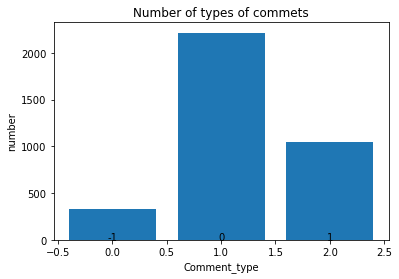

In [65]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')
        
x = ['postive', 'nuetral', 'negative']
y = [-1, 0, 1]

plt.bar(range(3), [negative_sum, neutral_sum, pos_sum]);
addlabels(x, y)
plt.title('Number of types of commets');
plt.xlabel('Comment_type');
plt.ylabel('number');

## References
- Cambria, E., Das, D., Bandyopadhyay, S., & Feraco, A. (Eds.). (2017). A practical guide to sentiment analysis (pp. 1-196). Cham, Switzerland: Springer International Publishing.

- Ahmad, K. (Ed.). (2011). Affective computing and sentiment analysis: Emotion, metaphor and terminology (Vol. 45). Springer Science & Business Media.

- Wu, C., Le Vine, S., Bengel, E., Czerwinski, J., & Polak, J. (2021). Sentiment analysis of popular-music references to automobiles, 1950s to 2010s. Transportation, 1-38.
